# AstroPy Project

## Using:


## astropy.coordinates

In [1]:
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u

# load data from csv of data for Globalular Clusters
df = pd.read_csv('harris_gc.csv')


# create SkyCoord object using the df variable from pandas
coords = SkyCoord(ra=df['RA '].values,
                  dec=df['DEC'].values,
                  unit=(u.hourangle, u.deg),
                  distance=df['R_Sun'].astype(float) *u.kpc,
                  frame = 'icrs')

# extract cartesian coordinates safely (add the little cartesian value bit)
df['x_kpc'] = coords.cartesian.x.value
df['y_kpc'] = coords.cartesian.y.value
df['z_kpc'] = coords.cartesian.z.value

# print values 
print(df[['RA ', 'DEC', 'R_Sun', 'x_kpc', 'y_kpc', 'z_kpc']].head())


           RA           DEC  R_Sun      x_kpc      y_kpc      z_kpc
0  00 24 05.67  -72 04 52.6    4.5   1.376860   0.145288  -4.281723
1  00 52 45.24  -26 34 57.4    8.9   7.749256   1.815931  -3.982641
2  01 03 14.26  -70 50 55.6    8.6   2.714616   0.768641  -8.124042
3     02 02 57    -03 15 10   30.1  25.829809  15.359493  -1.707910
4  03 12 16.21  -55 12 58.4   16.3   6.213989   6.917716 -13.387365


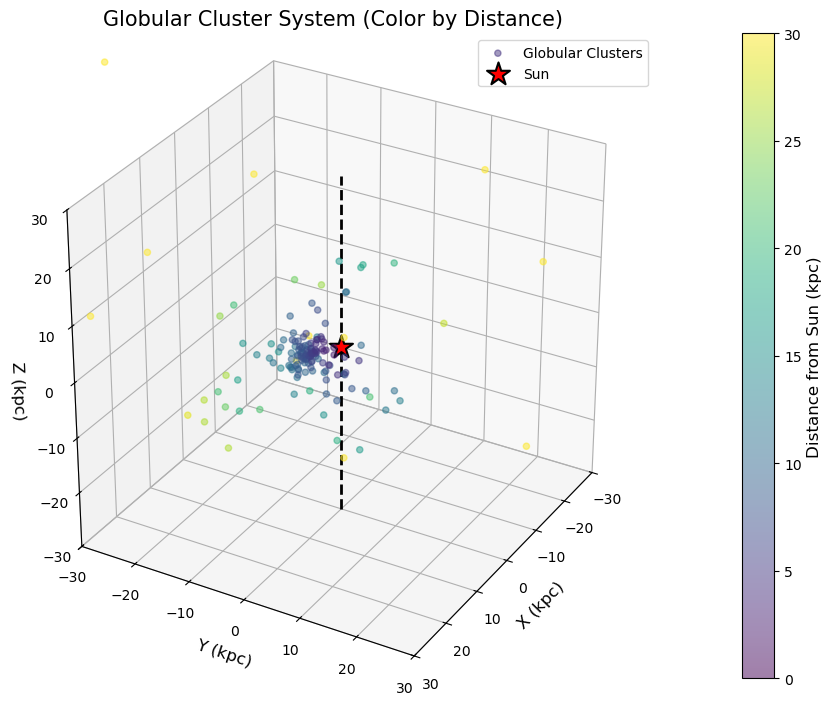

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# put arrays into values
x = df['x_kpc'].to_numpy()
y = df['y_kpc'].to_numpy()
z = df['z_kpc'].to_numpy()
distances = df['R_Sun'].to_numpy()  # distance from Sun in kpc (kiloparsecs)

fig, ax = plt.subplots(figsize=(9, 7), subplot_kw={"projection": "3d"})

# plot globular clusters color-coded by distance (clipped at 30 kpc for clarity)
sc = ax.scatter(x, y, z,
    c=np.clip(distances, 0, 30),
    cmap='viridis',
    s=20,
    alpha=0.5,
    vmin=0, vmax=30,
    label='Globular Clusters')

# plot the Sun at 0,0 (because all data is measured as distance from the sun)
ax.scatter(0, 0, 0, c='red', marker='*', s=300, edgecolors='black', linewidths=1.5, label='Sun')

# add line at z axis to show the sun as the center more clearly
ax.plot([0, 0], [0, 0], [-30, 30], color='black', linestyle='--', linewidth=2)

# labels and limits
ax.set_xlim([-30, 30])
ax.set_ylim([-30, 30])
ax.set_zlim([-30, 30])

ax.set_xlabel('X (kpc)', fontsize=12)
ax.set_ylabel('Y (kpc)', fontsize=12)
ax.set_zlabel('Z (kpc)', fontsize=12)
ax.set_title('Globular Cluster System (Color by Distance)', fontsize=15)
ax.set_box_aspect([1, 1, 1]) #make figure into a nice box shape

# add colorbar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Distance from Sun (kpc)', fontsize=12)

ax.legend()
ax.grid(True)
ax.view_init(elev=30, azim=30)  #adjusted by hand for clearer view of the sun
plt.tight_layout()


Calculated center (kpc): x = -2.01, y = -4.87, z = -3.41


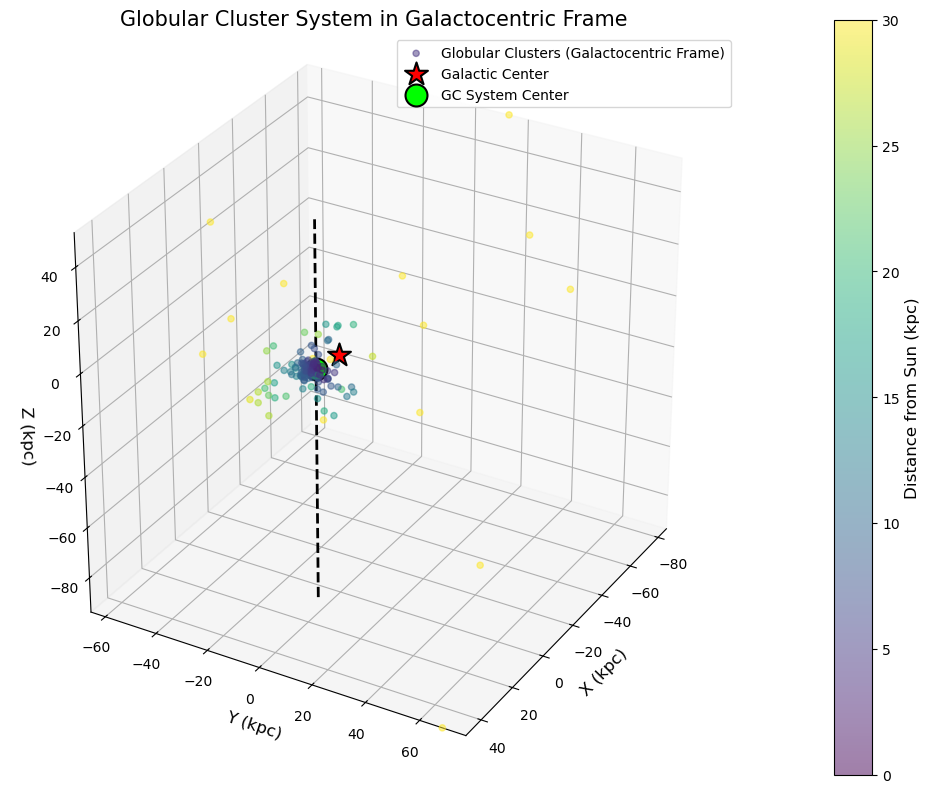

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# compute the "center" by averaging the components of each coordinate
x_center = np.mean(x)
y_center = np.mean(y)
z_center = np.mean(z)

print(f"Calculated center (kpc): x = {x_center:.2f}, y = {y_center:.2f}, z = {z_center:.2f}")

#next few steps put the coordinates in a galactocentric frame
# Define the Sun's position in Galactocentric coordinates (kpc)
X_sun = 8.122  # kpc
Y_sun = 0.0
Z_sun = 0.0    # optional: could use 0.0208 for vertical offset

# shift the heliocentric frame to be galactocentric
x_galacto = x + X_sun
y_galacto = y + Y_sun
z_galacto = z + Z_sun

# shift the center
x_center_galacto = x_center + X_sun
y_center_galacto = y_center + Y_sun
z_center_galacto = z_center + Z_sun


# make figure to plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": "3d"})

# plot the shift clusters (color coded by distance)
sc = ax.scatter(x_galacto, y_galacto, z_galacto,
    c=np.clip(distances, 0, 30),
    cmap='viridis',
    s=20,
    alpha=0.5,
    vmin=0, vmax=30,
    label='Globular Clusters (Galactocentric Frame)')

# plot the Galactic Center (now at (0,0,0))
ax.scatter(0, 0, 0, c='red', marker='*', s=300, edgecolors='black', linewidths=1.5, label='Galactic Center')

# plot the calculated center of GC system (shifted)
ax.scatter(x_center_galacto, y_center_galacto, z_center_galacto,
    color='lime', marker='o', s=250, edgecolors='black', linewidths=1.5, label='GC System Center')

# Vertical line through the GC System Center
ax.plot(
    [x_center_galacto, x_center_galacto],
    [y_center_galacto, y_center_galacto],
    [np.min(z_galacto), np.max(z_galacto)],
    color='black', linestyle='--', linewidth=2)

# set limits at the edges to display all of the data points
ax.set_xlim([np.min(x_galacto), np.max(x_galacto)])
ax.set_ylim([np.min(y_galacto), np.max(y_galacto)])
ax.set_zlim([np.min(z_galacto), np.max(z_galacto)])

# labels
ax.set_xlabel('X (kpc)', fontsize=12)
ax.set_ylabel('Y (kpc)', fontsize=12)
ax.set_zlabel('Z (kpc)', fontsize=12)
ax.set_title('Globular Cluster System in Galactocentric Frame', fontsize=15)
ax.set_box_aspect([1, 1, 1]) # forces cube shape

# show color bars
cbar = plt.colorbar(sc, ax=ax, pad=0.1) #pad changes distance to the plot
cbar.set_label('Distance from Sun (kpc)', fontsize=12)

# legend, grid, and view
ax.legend()
ax.grid(True)
ax.view_init(elev=30, azim=30)
plt.tight_layout()
